In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [30]:
df = pd.read_csv('../data/clean_reclean/time_series.csv')  # Ajuste le chemin si besoin

# Création de la colonne datetime
df['Date'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str) + '-01')

# Agrégation mensuelle
monthly_avg = df.groupby('Date')['SalePrice'].mean().reset_index()
monthly_avg.columns = ['Date', 'AverageSalePrice']

# Mise en index datetime
monthly_avg.set_index('Date', inplace=True)
monthly_avg.index.name = 'Date'

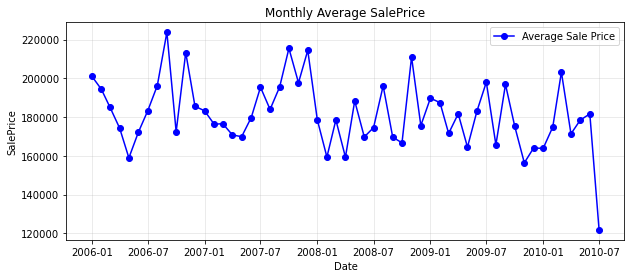

In [31]:
plt.figure(figsize=(10, 4))
plt.plot(monthly_avg, label='Average Sale Price', marker='o', linestyle='-', color='blue')
plt.grid(True, alpha=0.3)
plt.title('Monthly Average SalePrice')
plt.xlabel('Date')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

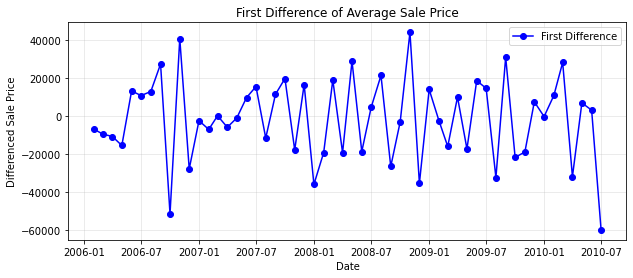

In [32]:
monthly_diff = monthly_avg['AverageSalePrice'].diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(monthly_diff, label='First Difference', marker='o', linestyle='-', color='blue')
plt.grid(True, alpha=0.3)
plt.title('First Difference of Average Sale Price')
plt.xlabel('Date')
plt.ylabel('Differenced Sale Price')
plt.legend()
plt.show()

In [33]:
X_orig = np.arange(len(monthly_avg)).reshape(-1, 1)
X_orig_const = sm.add_constant(X_orig)
y_orig = monthly_avg['AverageSalePrice'].values
model_orig = sm.OLS(y_orig, X_orig_const).fit()
original_p_values = model_orig.pvalues[1]
print(f"Original series trend p-value: {original_p_values:.4f}")

Original series trend p-value: 0.0254


In [34]:
log_avg = np.log(monthly_avg['AverageSalePrice'])
log_diff = log_avg.diff().dropna()

X_log_diff = np.arange(len(log_diff)).reshape(-1, 1)
X_log_diff_const = sm.add_constant(X_log_diff)
y_log_diff = log_diff.values
model_log_diff = sm.OLS(y_log_diff, X_log_diff_const).fit()
log_diff_p_value = model_log_diff.pvalues[1]
print(f"Log-differenced series trend p-value: {log_diff_p_value:.4f}")

Log-differenced series trend p-value: 0.5835


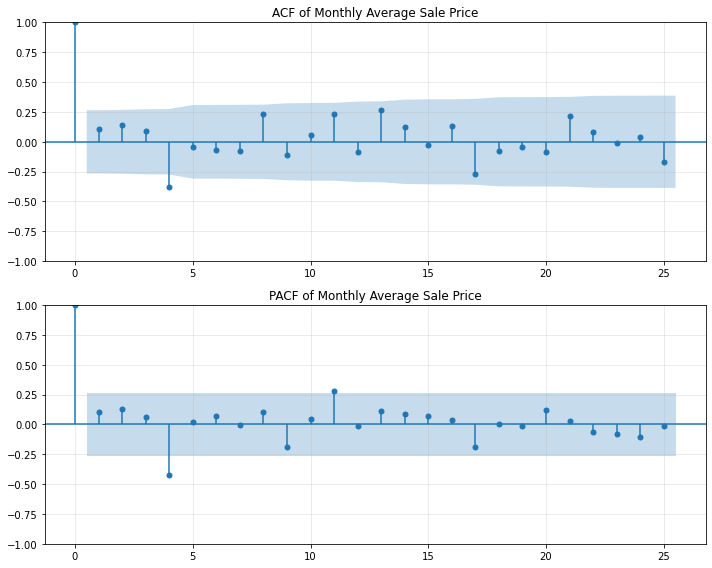

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(monthly_avg, lags=25, ax=axes[0])
axes[0].set_title('ACF of Monthly Average Sale Price')
axes[0].grid(True, alpha=0.3)

plot_pacf(monthly_avg, lags=25, ax=axes[1])
axes[1].set_title('PACF of Monthly Average Sale Price')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [36]:
print(monthly_avg)

            AverageSalePrice
Date                        
2006-01-01     201090.000000
2006-02-01     194322.222222
2006-03-01     184982.200000
2006-04-01     174312.814815
2006-05-01     158928.289474
2006-06-01     172283.333333
2006-07-01     183211.059701
2006-08-01     196239.956522
2006-09-01     223768.866667
2006-10-01     172356.708333
2006-11-01     213285.000000
2006-12-01     185545.000000
2007-01-01     183234.615385
2007-02-01     176301.750000
2007-03-01     176567.782609
2007-04-01     170772.608696
2007-05-01     169873.511628
2007-06-01     179725.813559
2007-07-01     195396.843137
2007-08-01     183941.075000
2007-09-01     195533.818182
2007-10-01     215428.812500
2007-11-01     197709.333333
2007-12-01     214414.500000
2008-01-01     178504.692308
2008-02-01     159370.000000
2008-03-01     178505.277778
2008-04-01     159293.346154
2008-05-01     188334.473684
2008-06-01     169730.941176
2008-07-01     174562.653061
2008-08-01     196076.965517
2008-09-01    

/home/tim/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tim/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tim/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tim/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tim/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

                                   Model  Forecast Error Variance
0   ARIMA(0, 1, 6) x SARIMA(1, 0, 0, 12)             3.049702e+08
1   ARIMA(0, 1, 5) x SARIMA(1, 0, 0, 12)             3.061114e+08
2   ARIMA(0, 1, 4) x SARIMA(1, 0, 0, 12)             3.090492e+08
3   ARIMA(2, 1, 2) x SARIMA(1, 0, 0, 12)             3.789220e+08
4   ARIMA(3, 1, 2) x SARIMA(1, 0, 0, 12)             4.032575e+08
5   ARIMA(3, 1, 1) x SARIMA(1, 0, 0, 12)             4.065539e+08
6   ARIMA(1, 1, 1) x SARIMA(1, 0, 0, 12)             4.156135e+08
7   ARIMA(1, 1, 0) x SARIMA(1, 0, 0, 12)             4.160446e+08
8   ARIMA(2, 1, 3) x SARIMA(1, 0, 0, 12)             4.212128e+08
9   ARIMA(3, 1, 0) x SARIMA(1, 0, 0, 12)             4.221249e+08
10  ARIMA(2, 1, 1) x SARIMA(1, 0, 0, 12)             4.639422e+08
11  ARIMA(1, 1, 3) x SARIMA(1, 0, 0, 12)             4.753021e+08
12  ARIMA(1, 1, 2) x SARIMA(1, 0, 0, 12)             4.849098e+08
13  ARIMA(2, 1, 0) x SARIMA(1, 0, 0, 12)             4.945953e+08


/home/tim/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tim/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


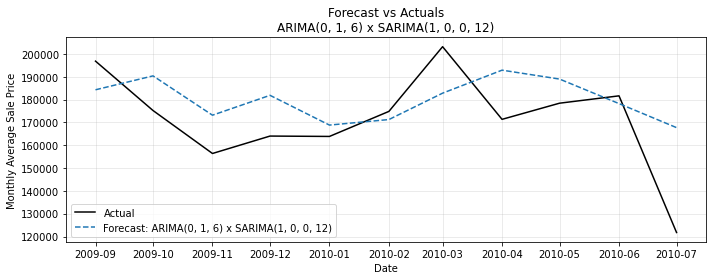

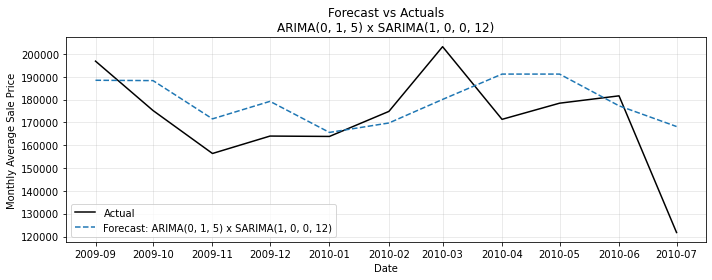

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Split dataset,
n = len(monthly_avg)
split = int(n * 0.8)  # 80% for training, 20% for testing
train = monthly_avg.iloc[:split]
test = monthly_avg.iloc[split:]

#Specify combinations,
non_seasonal_orders = [
    (0,1,4),
    (0,1,5),
    (0,1,6),
    (1,1,0),
    (1,1,1),
    (1,1,2),
    (1,1,3),
    (2,1,0),
    (2,1,1),
    (2,1,2),
    (2,1,3),
    (3,1,0),
    (3,1,1),
    (3,1,2),

]

seasonal_orders = [
    (1,0,0,12),

]

# Dictionary to hold results,
results = {}

# Loop over combinations,
for ns_order in non_seasonal_orders:
    for s_order in seasonal_orders:
        label = f'ARIMA{ns_order} x SARIMA{s_order}'
        preds = []
        actuals = []
        history = train.copy()

        for t in range(len(test)):
            model = SARIMAX(history,
                            order=ns_order,
                            seasonal_order=s_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False).fit(disp=False)

            forecast = model.forecast(steps=1).iloc[0]
            actual = test['AverageSalePrice'].iloc[t]

            preds.append(forecast)
            actuals.append(actual)

            # Update history with actual
            history = pd.concat([history, test.iloc[[t]]])

        errors = np.array(actuals) - np.array(preds)
        var_error = np.var(errors)

        results[label] = {
            'Forecasts': preds,
            'Actuals': actuals,
            'Errors': errors,
            'Variance of Forecast Error': var_error
        }

# Create summary DataFrame and get best two models,
summary_df = pd.DataFrame([
    {'Model': name, 'Forecast Error Variance': res['Variance of Forecast Error']}
    for name, res in results.items()
]).sort_values('Forecast Error Variance').reset_index(drop=True)

print(summary_df)
# Plot only top 2 models,
for name in summary_df['Model'][:2]:
    res = results[name]
    # Ensure both x and y are numpy arrays of the same length
    x = test.index.values[:len(res['Actuals'])]
    actuals = np.array(res['Actuals'])
    forecasts = np.array(res['Forecasts'])
    plt.figure(figsize=(10, 4))
    plt.plot(x, actuals, label='Actual', color='black')
    plt.plot(x, forecasts, label=f'Forecast: {name}', linestyle='--')
    plt.title(f'Forecast vs Actuals\n{name}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Average Sale Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()